### Ensf 444 - ML Project

###### Dataset: Rabie El Kharoua. (2024). Alzheimer's Disease Dataset [Data set]. Kaggle.
###### https://doi.org/10.34740/KAGGLE/DSV/8668279

##### How to run
##### 1. Ensure the following dependencies are installed (if not already installed):
- use `pip install` to acquire numpy, pandas, scikit-learn, matplotlib, and seaborn

##### 2. Ensure the dataset is in the same directory as this ipynb

##### 3. Run each cell in order:
- Imports, Load Data, Preprocessing, Grid Search, Results, and lastly Analysis/Report

#### Imports

In [ ]:
# All Imports Used Within This Project
# Load Data
import pandas as pd

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split

# Grid Search
from sklearn.model_selection import GridSearchCV

# Confusion Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


#### Load Data

In [ ]:
# Loading
df = pd.read_csv('alzheimers_disease_data.csv')
print('Loaded in DataFrame Shape:', df.shape)

# Remove PatientID and DoctorInCharge (unnecessary for analysis)
df = df.drop(columns=['PatientID', 'DoctorInCharge'])
print('DataFrame Shape With Removed Features:', df.shape)

# Check Data Types and Missing Values (fill in if needed)
print('\nData Types for Features')
print(df.dtypes)
print('\nMissing Values for Each Feature')
print(df.isnull().sum())

Loaded in DataFrame Shape: (2149, 35)
DataFrame Shape With Removed Features: (2149, 33)

Data Types for Features
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64

#### Preprocessing

In [ ]:
# Separate Features Into Numerical and Categorical
num = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

cat = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 
       'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 
       'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 
       'DifficultyCompletingTasks', 'Forgetfulness']

# Scaling Column Transformer
sct = ColumnTransformer(transformers=[('scaling', StandardScaler(), num),
                                      ('onehot', OneHotEncoder(), cat)])
# Encoding Column Transformer
ect = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), cat)], remainder='passthrough')

In [ ]:
# Create Pipelines
# Logistic Regression Pipeline
lrp = Pipeline(steps=[('preprocessor', sct), ('classifier', LogisticRegression())])

# Random Forest Pipeline
rfp = Pipeline(steps=[('preprocessor', ect), ('classifier', RandomForestClassifier())])

# Gradient Boosting Pipeline
gbp = Pipeline(steps=[('preprocessor', ect), ('classifier', GradientBoostingClassifier())])

In [ ]:
# Feature Matrix and Target Vector
X = df[num + cat]
y = df['Diagnosis']

# Train Test Split With a Test Size of 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print('X_Train Shape:', X_train.shape)
print('X_Test Shape: ', X_test.shape)

X_Train Shape: (1934, 32)
X_Test Shape:  (215, 32)


#### Grid Search

In [ ]:
# Parameter Grid (testing wide array of values)
param_grid = [{'preprocessor': [sct],
               'classifier': [LogisticRegression()],
               'classifier__C': [0.1, 1, 10]},
              {'preprocessor': [ect],
               'classifier': [RandomForestClassifier()],
               'classifier__n_estimators': [50, 100, 200],
               'classifier__max_depth': [None, 5, 10],
               'classifier__min_samples_split': [2, 5, 10]},
              {'preprocessor': [ect],
               'classifier': [GradientBoostingClassifier()],
               'classifier__n_estimators': [50, 100, 200],
               'classifier__learning_rate': [0.01, 0.1, 0.5]}]

# Initialize Grid Object
grid = GridSearchCV(estimator=lrp, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)

# Fit Grid Object
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'BMI',
                                                                          'AlcoholConsumption',
                                                                          'PhysicalActivity',
                                                                          'DietQuality',
                                                                          'SleepQuality',
                                                                          'SystolicBP',
                                                                          'DiastolicBP',
                                                                          'CholesterolTotal',
                                                                          'CholesterolLDL',
                                                                          'CholesterolHDL',
                                                                          'CholesterolTriglycerides',
                                                                          'MMSE',
                                                                          'FunctionalAssessment',
                                                                          'ADL']),
                                                                        ('o...
                                                             transformers=[('onehot',
                                                                            OneHotEncoder(),
                                                                            ['Gender',
                                                                             'Ethnicity',
                                                                             'EducationLevel',
                                                                             'Smoking',
                                                                             'FamilyHistoryAlzheimers',
                                                                             'CardiovascularDisease',
                                                                             'Diabetes',
                                                                             'Depression',
                                                                             'HeadInjury',
                                                                             'Hypertension',
                                                                             'MemoryComplaints',
                                                                             'BehavioralProblems',
                                                                             'Confusion',
                                                                             'Disorientation',
                                                                             'PersonalityChanges',
                                                                             'DifficultyCompletingTasks',
                                                                             'Forgetfulness'])])]}],
             return_train_score=True)

#### Resutls

In [ ]:
# Function for Shortening Classifier Output
def shorten(params):
    classifier = params['classifier']

    # Change Logistic Regression Output
    if isinstance(classifier, LogisticRegression):
        C = params.get('classifier__C', 'N/A')
        return f"LogReg(C={C})"

    # Change Random Forest Output 
    elif isinstance(classifier, RandomForestClassifier):
        n_estimators = params.get('classifier__n_estimators', 'N/A')
        max_depth = params.get('classifier__max_depth', 'N/A')
        min_samples_split = params.get('classifier__min_samples_split', 'N/A')
        return f"RF(n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split})"

    # Change Gradient Boosting Output 
    elif isinstance(classifier, GradientBoostingClassifier):
        n_estimators = params.get('classifier__n_estimators', 'N/A')
        learning_rate = params.get('classifier__learning_rate', 'N/A')
        return f"GB(n_estimators={n_estimators}, learning_rate={learning_rate})"
    
    return str(params)

# Change Display Output so Columns are not Split
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# Display Results DataFrame
results = pd.DataFrame(grid.cv_results_)
results['params'] = results['params'].apply(shorten)
print(results[['params', 'mean_test_score', 'mean_train_score']])

                                                        params  mean_test_score  mean_train_score
0                                                LogReg(C=0.1)         0.839702          0.848630
1                                                  LogReg(C=1)         0.835567          0.847466
2                                                 LogReg(C=10)         0.835567          0.847466
3     RF(n_estimators=50, max_depth=None, min_samples_split=2)         0.930701          1.000000
4    RF(n_estimators=100, max_depth=None, min_samples_split=2)         0.937947          1.000000
5    RF(n_estimators=200, max_depth=None, min_samples_split=2)         0.941567          1.000000
6     RF(n_estimators=50, max_depth=None, min_samples_split=5)         0.932780          0.993149
7    RF(n_estimators=100, max_depth=None, min_samples_split=5)         0.938983          0.993924
8    RF(n_estimators=200, max_depth=None, min_samples_split=5)         0.945183          0.994958
9    RF(n_estimators

#### Analysis/Report

In [ ]:
# Best Parameters
print("Parameters:", grid.best_params_)

# Best CV Train Score
print("\nBest Cross-validation Train Score:", grid.best_score_)

# Best CV Test Score
bestModelIndex = grid.best_index_
bestTestScore = grid.cv_results_['mean_test_score'][bestModelIndex]
print("\nBest Cross-validation Test Score:", bestTestScore)

bestModel = grid.best_estimator_

# Train Set Accuracy
trainAcc = bestModel.score(X_train, y_train)
print("\nTrain Set Accuracy:", trainAcc)

# Test Set Accuracy
testAcc = bestModel.score(X_test, y_test)
print("\nTest Set Accuracy:", testAcc)

Parameters: {'classifier': GradientBoostingClassifier(), 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100, 'preprocessor': ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Gender', 'Ethnicity', 'EducationLevel',
                                  'Smoking', 'FamilyHistoryAlzheimers',
                                  'CardiovascularDisease', 'Diabetes',
                                  'Depression', 'HeadInjury', 'Hypertension',
                                  'MemoryComplaints', 'BehavioralProblems',
                                  'Confusion', 'Disorientation',
                                  'PersonalityChanges',
                                  'DifficultyCompletingTasks',
                                  'Forgetfulness'])])}

Best Cross-validation Train Score: 0.9462170810405537

Best Cross-validation Test Score: 0.9462170810405537

Train Set Accuracy: 0.96432264736297

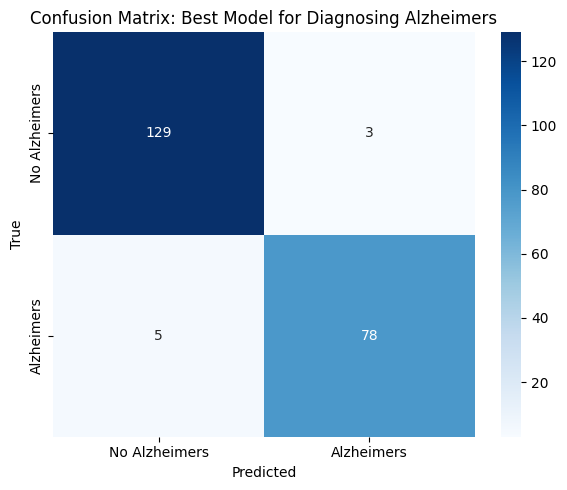

Precision: 0.9629629629629629
Accuracy:  0.9627906976744186
Recall:    0.9397590361445783
F1 Score:  0.9512195121951219


In [ ]:
# Confusion matrix
y_pred = bestModel.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Alzheimers", "Alzheimers"], yticklabels=["No Alzheimers", "Alzheimers"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix: Best Model for Diagnosing Alzheimers")
plt.tight_layout()
plt.show()

# Metrics
print('Precision:', precision_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall:   ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

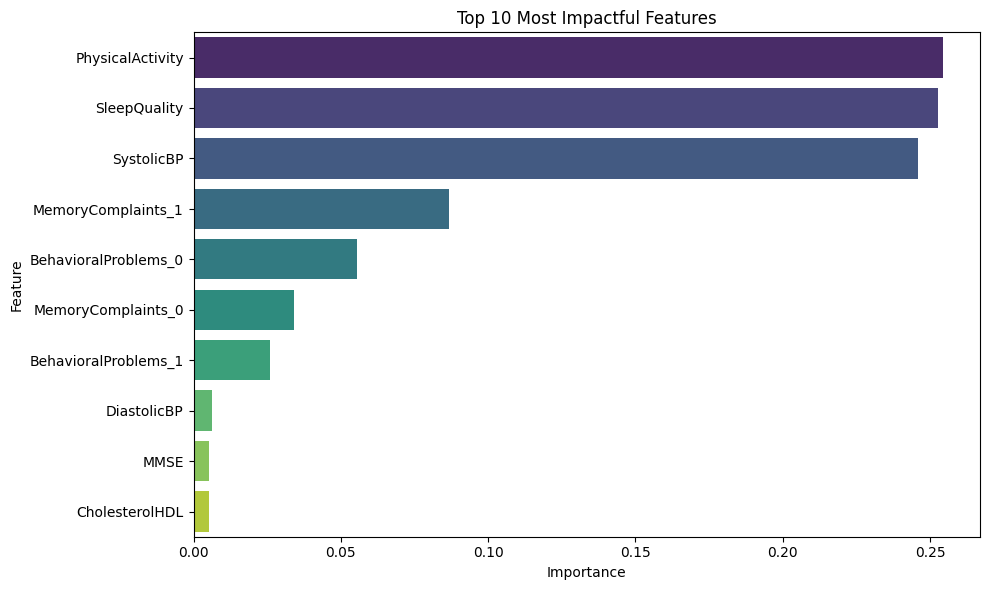

In [ ]:
# Finding Most Impactful Features
preprocessor = bestModel.named_steps['preprocessor']
classifier = bestModel.named_steps['classifier']

# Get Features and Importance
one = preprocessor.named_transformers_['onehot']
oneFeat = one.get_feature_names_out(preprocessor.transformers_[0][2])

passCols = X_train.columns.difference(preprocessor.transformers[0][2])
finalFeat = np.concatenate([oneFeat, passCols])

importances = classifier.feature_importances_

# DataFrame for Feature and Importance
dfFeat = pd.DataFrame({
    'Feature': finalFeat,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Most Impactful Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dfFeat.head(10), palette='viridis')
plt.title('Top 10 Most Impactful Features')
plt.tight_layout()
plt.show()

##### What Each Score Means
- After performing grid search, the best performing model was Gradient Boosting with n_estimators=100 and a learning_rate=0.1. This model consistently delivered high scores across metrics. The cross-validation train score was found to be over 0.94, indicating the model learns patterns well without underfitting. The cross-validation test score was also over 0.94, which means the model generalizes well and is not overfitting. Finally, the train accuracy and test accuracy were both above 0.96, showing that the model performs well on both known (training) and unseen (testing) data. From these results, we can conclude that the model is reliable and could be applied to real world scenarios.

##### Confusion Matrix and Metrics
- From the confusion matrix we can see that the best model (Gradient Boosting) is great in classifying correctly whether a patient has Alzheimers or not. In the confusion matrix we see that TN is 129, TP is 78, FN is 5, and FP is 3. From this we can determine the precision, accuracy, recall, and f1 score being roughly 0.96, 0.96, 0.94, and 0.95 respectively. These metrics show the model is excellent at correctly identifying patients with and without Alzheimers. In particular, a high recall indicates that the model successfully identifies most patients who have the disease, while high precision shows it rarely misclassifies healthy individuals as having Alzheimers.

##### Important Features
- When displaying the models feature importance, we can better understand what features played a role in contributing to its prediction accuracy. Important features such as PhysicalActivity, SleepQuality, SystolicBP, etc were found to impact the model the most. From these results it can be inferred that more research into these features and their links to Alzheimers should be studied, which can aid in potential medical breakthroughs.